# Cambridge Face Test

### importing modules

In [1]:
import sys
import os
import fnmatch

import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../modules/')
import case_stats as cs

settings for plot formatting

In [2]:
myPal = sns.color_palette("Set1")
sns.set_context("poster")
sns.set_style("white")

### get logfiles

In [3]:
def getLogfile(whichfolder, whichexperiment):

    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            loglist.append(whichfolder + fileName)
    loglist.sort()
    return loglist

In [4]:
logList = getLogfile('../CFMT/experiment/data/', '*.csv')

In [5]:
logList[-5:]

['../CFMT/experiment/data/6_Cambridge_final3_2017_Jan_27_1001.csv',
 '../CFMT/experiment/data/7_Cambridge_final3_2017_Jan_30_1417.csv',
 '../CFMT/experiment/data/8_Cambridge_final3_2017_Feb_01_1610.csv',
 '../CFMT/experiment/data/9_Cambridge_final3_2017_Feb_02_1211.csv',
 '../CFMT/experiment/data/jb_Cambridge_final3_2016_Nov_23_1332.csv']

### load table into pandas

In [6]:
df = pd.read_csv(logList[-1])

In [7]:
df.tail()

,num,pic,learn1,learn2,learn3,recall2,recall3,recall1,bart_loop.thisRepN,bart_loop.thisTrialN,...,rating_8.response,rating_8.rt,key_resp_7.keys,key_resp_7.rt,date,frameRate,expName,session,participant,Unnamed: 53
65,20.0,./stim/NoiseFLSA011_T1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,8.417,NaN,NaN,2016_Nov_23_1332,59.954423,Cambridge_final3,1,jb,NaN
66,17.0,./stim/NoiseFHSA049_T1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,27.082,NaN,NaN,2016_Nov_23_1332,59.954423,Cambridge_final3,1,jb,NaN
67,5.0,./stim/Noise30LA049_T2.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,8.667,NaN,NaN,2016_Nov_23_1332,59.954423,Cambridge_final3,1,jb,NaN
68,7.0,./stim/Noise60RA004_T1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,13.034,NaN,NaN,2016_Nov_23_1332,59.954423,Cambridge_final3,1,jb,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,space,48.329006,2016_Nov_23_1332,59.954423,Cambridge_final3,1,jb,NaN


### Part1: Single Face Recognition

In [8]:
def makeThisFirstDf(df):
    bigDf = pd.DataFrame()
    for learn,resp in ([1,4],[2,5],[3,6]):
        thisDf = pd.concat([df['recall%s' % learn], 
                            df['rating_%s.response' % resp],
                            df['rating_%s.rt' % resp] ],
                           axis=1).dropna()
        
        thisDf.columns = ['pic','ans','rt']
        bigDf = pd.concat([bigDf,thisDf],axis=0)
    bigDf.index = [[x[14] for x in list( bigDf['pic'])],bigDf.index]
    return bigDf

In [9]:
thisDf = makeThisFirstDf(df)

In [10]:
thisDf.tail()

pic  ans      rt
0 7   ./stim/LearnRA040_T1.jpg  1.0   8.400
  8   ./stim/LearnRA004_T3.jpg  3.0   6.934
  9   ./stim/LearnRA049_T3.jpg  3.0  10.184
  10  ./stim/LearnRA011_T3.jpg  3.0  12.650
  11  ./stim/LearnRA022_T1.jpg  1.0   8.501

### get information about correct response from picture name

In [11]:
def whatsCorr(df):
    copyDf = df.copy()
    copyDf['corr'] = [float(x[-5]) for x in list(copyDf['pic'])]
    return copyDf

In [12]:
whatsCorr(thisDf).tail()

pic  ans      rt  corr
0 7   ./stim/LearnRA040_T1.jpg  1.0   8.400   1.0
  8   ./stim/LearnRA004_T3.jpg  3.0   6.934   3.0
  9   ./stim/LearnRA049_T3.jpg  3.0  10.184   3.0
  10  ./stim/LearnRA011_T3.jpg  3.0  12.650   3.0
  11  ./stim/LearnRA022_T1.jpg  1.0   8.501   1.0

### compute the number of correct and total responses for this part

In [13]:
def percentCorr(df):
    nCorr = len(np.where(df['corr'] == df['ans'])[-1])
    nTotal = df.shape[0]
    return float(nCorr), float(nTotal)

In [14]:
nCorr, nTotal = percentCorr(whatsCorr(thisDf))

In [15]:
nCorr/nTotal*100

100.0

### compute the median of the RT

In [16]:
def medianRT(df):
    return df.median().rt

In [17]:
print medianRT(thisDf), medianRT(whatsCorr(thisDf))

9.4675 9.4675


### second part (memory normal)

In [18]:
def makeThisDf(df,resp):
    thisDf = pd.concat([df['pic'],df['rating_%s.response' % resp ],df['rating_%s.rt' % resp ] ],axis=1).dropna()
    thisDf.columns = ['pic','ans','rt']
    return thisDf

In [19]:
thisDf = makeThisDf(df,'7')

In [20]:
thisDf.tail()

,pic,ans,rt
39,./stim/Novel30RHSA022_T1.jpg,3.0,6.318
40,./stim/Novel30RHSA049_T3.jpg,1.0,8.034
41,./stim/NovelHLFA040_T1.jpg,3.0,13.550
42,./stim/Novel60RA004_T2.jpg,1.0,15.483
43,./stim/NovelHLFA004_T3.jpg,2.0,9.651


In [21]:
thisDf = whatsCorr(thisDf)

In [22]:
thisDf.tail()

,pic,ans,rt,corr
39,./stim/Novel30RHSA022_T1.jpg,3.0,6.318,1.0
40,./stim/Novel30RHSA049_T3.jpg,1.0,8.034,3.0
41,./stim/NovelHLFA040_T1.jpg,3.0,13.550,1.0
42,./stim/Novel60RA004_T2.jpg,1.0,15.483,2.0
43,./stim/NovelHLFA004_T3.jpg,2.0,9.651,3.0


In [23]:
nCorr, nTotal = percentCorr(thisDf)

In [24]:
nCorr/nTotal*100

36.666666666666664

### third part (memory noise)

In [25]:
thisDf = makeThisDf(df, '8')

In [26]:
thisDf.tail()

,pic,ans,rt
64,./stim/Noise60RA022_T3.jpg,2.0,12.834
65,./stim/NoiseFLSA011_T1.jpg,3.0,8.417
66,./stim/NoiseFHSA049_T1.jpg,2.0,27.082
67,./stim/Noise30LA049_T2.jpg,3.0,8.667
68,./stim/Noise60RA004_T1.jpg,1.0,13.034


In [27]:
thisDf = whatsCorr(thisDf)

In [28]:
thisDf.tail()

,pic,ans,rt,corr
64,./stim/Noise60RA022_T3.jpg,2.0,12.834,3.0
65,./stim/NoiseFLSA011_T1.jpg,3.0,8.417,1.0
66,./stim/NoiseFHSA049_T1.jpg,2.0,27.082,1.0
67,./stim/Noise30LA049_T2.jpg,3.0,8.667,2.0
68,./stim/Noise60RA004_T1.jpg,1.0,13.034,1.0


In [29]:
nCorr,nTotal = percentCorr(thisDf)

In [30]:
nCorr/nTotal*100

33.33333333333333

### average for all 3 

In [31]:
def makeCount(thisDf, d, part):
    nCorr, nTotal = percentCorr(whatsCorr(thisDf))
    rt = medianRT(thisDf)
    d[part] = {'hit': nCorr, 'total': nTotal, 'rt': rt}
    #d['all']['hit']+=nCorr; d['all']['total']+=nTotal
    return d

In [32]:
def makeParticipant(df, pName):

    d = {}

    # 1st
    thisDf = makeThisFirstDf(df)
    d = makeCount(thisDf, d, '1st')
    # 2nd
    thisDf = makeThisDf(df, '7')
    d = makeCount(thisDf, d, '2nd')
    # 3rd
    thisDf = makeThisDf(df, '8')
    d = makeCount(thisDf, d, '3rd')

    sumDf = pd.DataFrame(d).T
    sumDf['percent'] = [
        sumDf.loc[x].hit / sumDf.loc[x].total * 100 for x in sumDf.index
    ]

    sumDf.index = [[pName] * len(sumDf.index), sumDf.index]

    return sumDf

In [33]:
sumDf = makeParticipant(df, 'pName')

In [34]:
sumDf

hit       rt  total     percent
pName 1st  18.0   9.4675   18.0  100.000000
      2nd  11.0  13.8840   30.0   36.666667
      3rd   8.0   8.9590   24.0   33.333333

## Do this for all participants

In [35]:
def makeBig(logList):
    bigDf = pd.DataFrame()
    for logFile in logList:
        df = pd.read_csv(logFile)
        pName = logFile[logFile.rfind('/') + 1:logFile.rfind('_Cam')]
        sumDf = makeParticipant(df, pName)
        bigDf = pd.concat([bigDf, sumDf])
    return bigDf

In [36]:
bigDf = makeBig(logList)

In [37]:
bigDf.loc['24']

,hit,rt,total,percent
1st,16.0,5.5340,18.0,88.888889
2nd,24.0,6.4000,30.0,80.000000
3rd,6.0,6.6165,24.0,25.000000


### stats of control group

In [47]:
bigDf.drop('jb',level=0).groupby(level=0).sum().describe()

,hit,rt,total,percent
count,27.000000,27.000000,27.0,27.000000
mean,58.851852,15.643907,72.0,248.713992
std,7.064013,3.699424,0.0,27.381375
min,42.000000,10.170500,72.0,186.944444
25%,55.000000,12.811250,72.0,234.305556
50%,60.000000,15.152000,72.0,256.666667
75%,63.500000,18.534250,72.0,267.083333
max,68.000000,22.931500,72.0,284.166667


### plotting of results

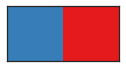

In [38]:
myPalette = sns.color_palette('Set1', 2)[::-1]
sns.palplot(myPalette)

In [39]:
myDf = bigDf.unstack(1)

In [40]:
myDf.tail()

hit                  rt                  total                 percent  \
     1st   2nd   3rd     1st      2nd     3rd   1st   2nd   3rd         1st   
6   18.0  22.0  16.0  3.9425   7.9160  5.0255  18.0  30.0  24.0  100.000000   
7   17.0  22.0  19.0  4.1595   7.6415  6.7170  18.0  30.0  24.0   94.444444   
8   17.0  29.0  13.0  4.0540   4.2380  5.2990  18.0  30.0  24.0   94.444444   
9   18.0  29.0  17.0  3.4930   6.2665  6.6585  18.0  30.0  24.0  100.000000   
jb  18.0  11.0   8.0  9.4675  13.8840  8.9590  18.0  30.0  24.0  100.000000   

                          
          2nd        3rd  
6   73.333333  66.666667  
7   73.333333  79.166667  
8   96.666667  54.166667  
9   96.666667  70.833333  
jb  36.666667  33.333333

In [41]:
myDf.to_csv('../CFMT/output/cambridgeFaces.csv')

### get raw data

In [42]:
raw_df = myDf.loc[['jb'],'percent'].T
raw_df.columns = ['% correct']
raw_df

,% correct
1st,100.000000
2nd,36.666667
3rd,33.333333


### get percentiles

In [43]:
percentile_df = cs.make_percentile_df(myDf.loc[:, 'percent'], 'jb')
percentile_df

,percentile,z
1st,72.955529,0.611469
2nd,0.020554,-3.532865
3rd,0.978091,-2.334648


### ttest results

In [44]:
ttest_df = cs.make_tstats_df(myDf.loc[:, 'percent'], 'jb')
ttest_df

,t,df,p
1st,0.59,26,0.561
2nd,-3.40,26,0.002
3rd,-2.25,26,0.033


### save everything in one table

In [45]:
result_df = pd.concat([raw_df, percentile_df, ttest_df], axis=1)
# add hierarchy to index
result_df.index = [['Face recognition'] * result_df.shape[0],
                   ['CFMT %s' % x[0] for x in result_df.index]]
result_df

% correct  percentile         z      t  df      p
Face recognition CFMT 1  100.000000   72.955529  0.611469   0.59  26  0.561
                 CFMT 2   36.666667    0.020554 -3.532865  -3.40  26  0.002
                 CFMT 3   33.333333    0.978091 -2.334648  -2.25  26  0.033

In [46]:
result_df.to_csv('../reports/tables/cambridge_main_results.csv')

### plotting

In [47]:
sns.set_style('white')

figAcc, ax = plt.subplots(1, 1, figsize=(5, 6), dpi=300)

for p in bigDf.index.levels[0]:
    thisPercent = bigDf.loc[p]['percent']
    ax.plot(
        list(thisPercent),
        '-o',
        color=myPalette[p == 'jb'],
        alpha=0.6,
        linewidth=5)

ax.plot([], '-o', color=myPalette[1], label='JB')
ax.plot([], '-o', color=myPalette[0], label='controls')

#ax.set_xticks(range(thisPercent.shape[0]),thisPercent.index)
ax.set_xlim(-0.1, 2.1)
ax.set_xticks(np.arange(0, 2.1, 1))
ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.set_ylim(0, 105)
ax.set_yticks(
    np.arange(20, 101, 10), ['%s%%' % x for x in np.arange(20, 101, 10)])
sns.despine()

ax.set_title('Percent Correct for the CFMT')
ax.set_ylabel('correct responses')
ax.set_xlabel('Subtest')
plt.legend(loc='best')
ax.axhline(33, linewidth=1, color='k', linestyle='dashed')
plt.savefig('../CFMT/output/cambridgeAcc.png', bbox_inches='tight')
plt.close()

In [48]:
sns.set_style('white')

figRt, ax = plt.subplots(1, 1, figsize=(5, 6), dpi=300)

for p in bigDf.index.levels[0]:
    thisPercent = bigDf.loc[p]['rt']
    ax.plot(
        list(thisPercent),
        '-o',
        color=myPalette[p == 'jb'],
        alpha=0.6,
        linewidth=5)

ax.plot([], '-o', color=myPalette[1], label='JB')
ax.plot([], '-o', color=myPalette[0], label='controls')

#ax.set_xticks(range(thisPercent.shape[0]),thisPercent.index)
ax.set_xlim(-0.1, 2.1)
ax.set_xticks(np.arange(0, 2.1, 1))
ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.set_ylim(0, 15)
#ax.set_yticks(np.arange(20,101,10),['%s%%' % x for x in np.arange(20,101,10)])
sns.despine()

ax.set_title('Reaction Times for the CFMT')
ax.set_ylabel('median RT')
ax.set_xlabel('Subtest')
plt.legend(loc='best')
#ax.axhline(33,linewidth=1,color='k',linestyle='dashed')
plt.savefig('../CFMT/output/cambridgeRT.png', bbox_inches='tight')
plt.close()

In [49]:
from PIL import Image

In [50]:
sns.set_style('dark')

msFig, (ax1, ax2) = plt.subplots(2, 1, dpi=300)

ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1)
ax1.imshow(Image.open('../CFMT/output/cambridgeAcc.png', 'r'))
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1)
ax2.imshow(Image.open('../CFMT/output/cambridgeRT.png', 'r'))
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()
plt.close()

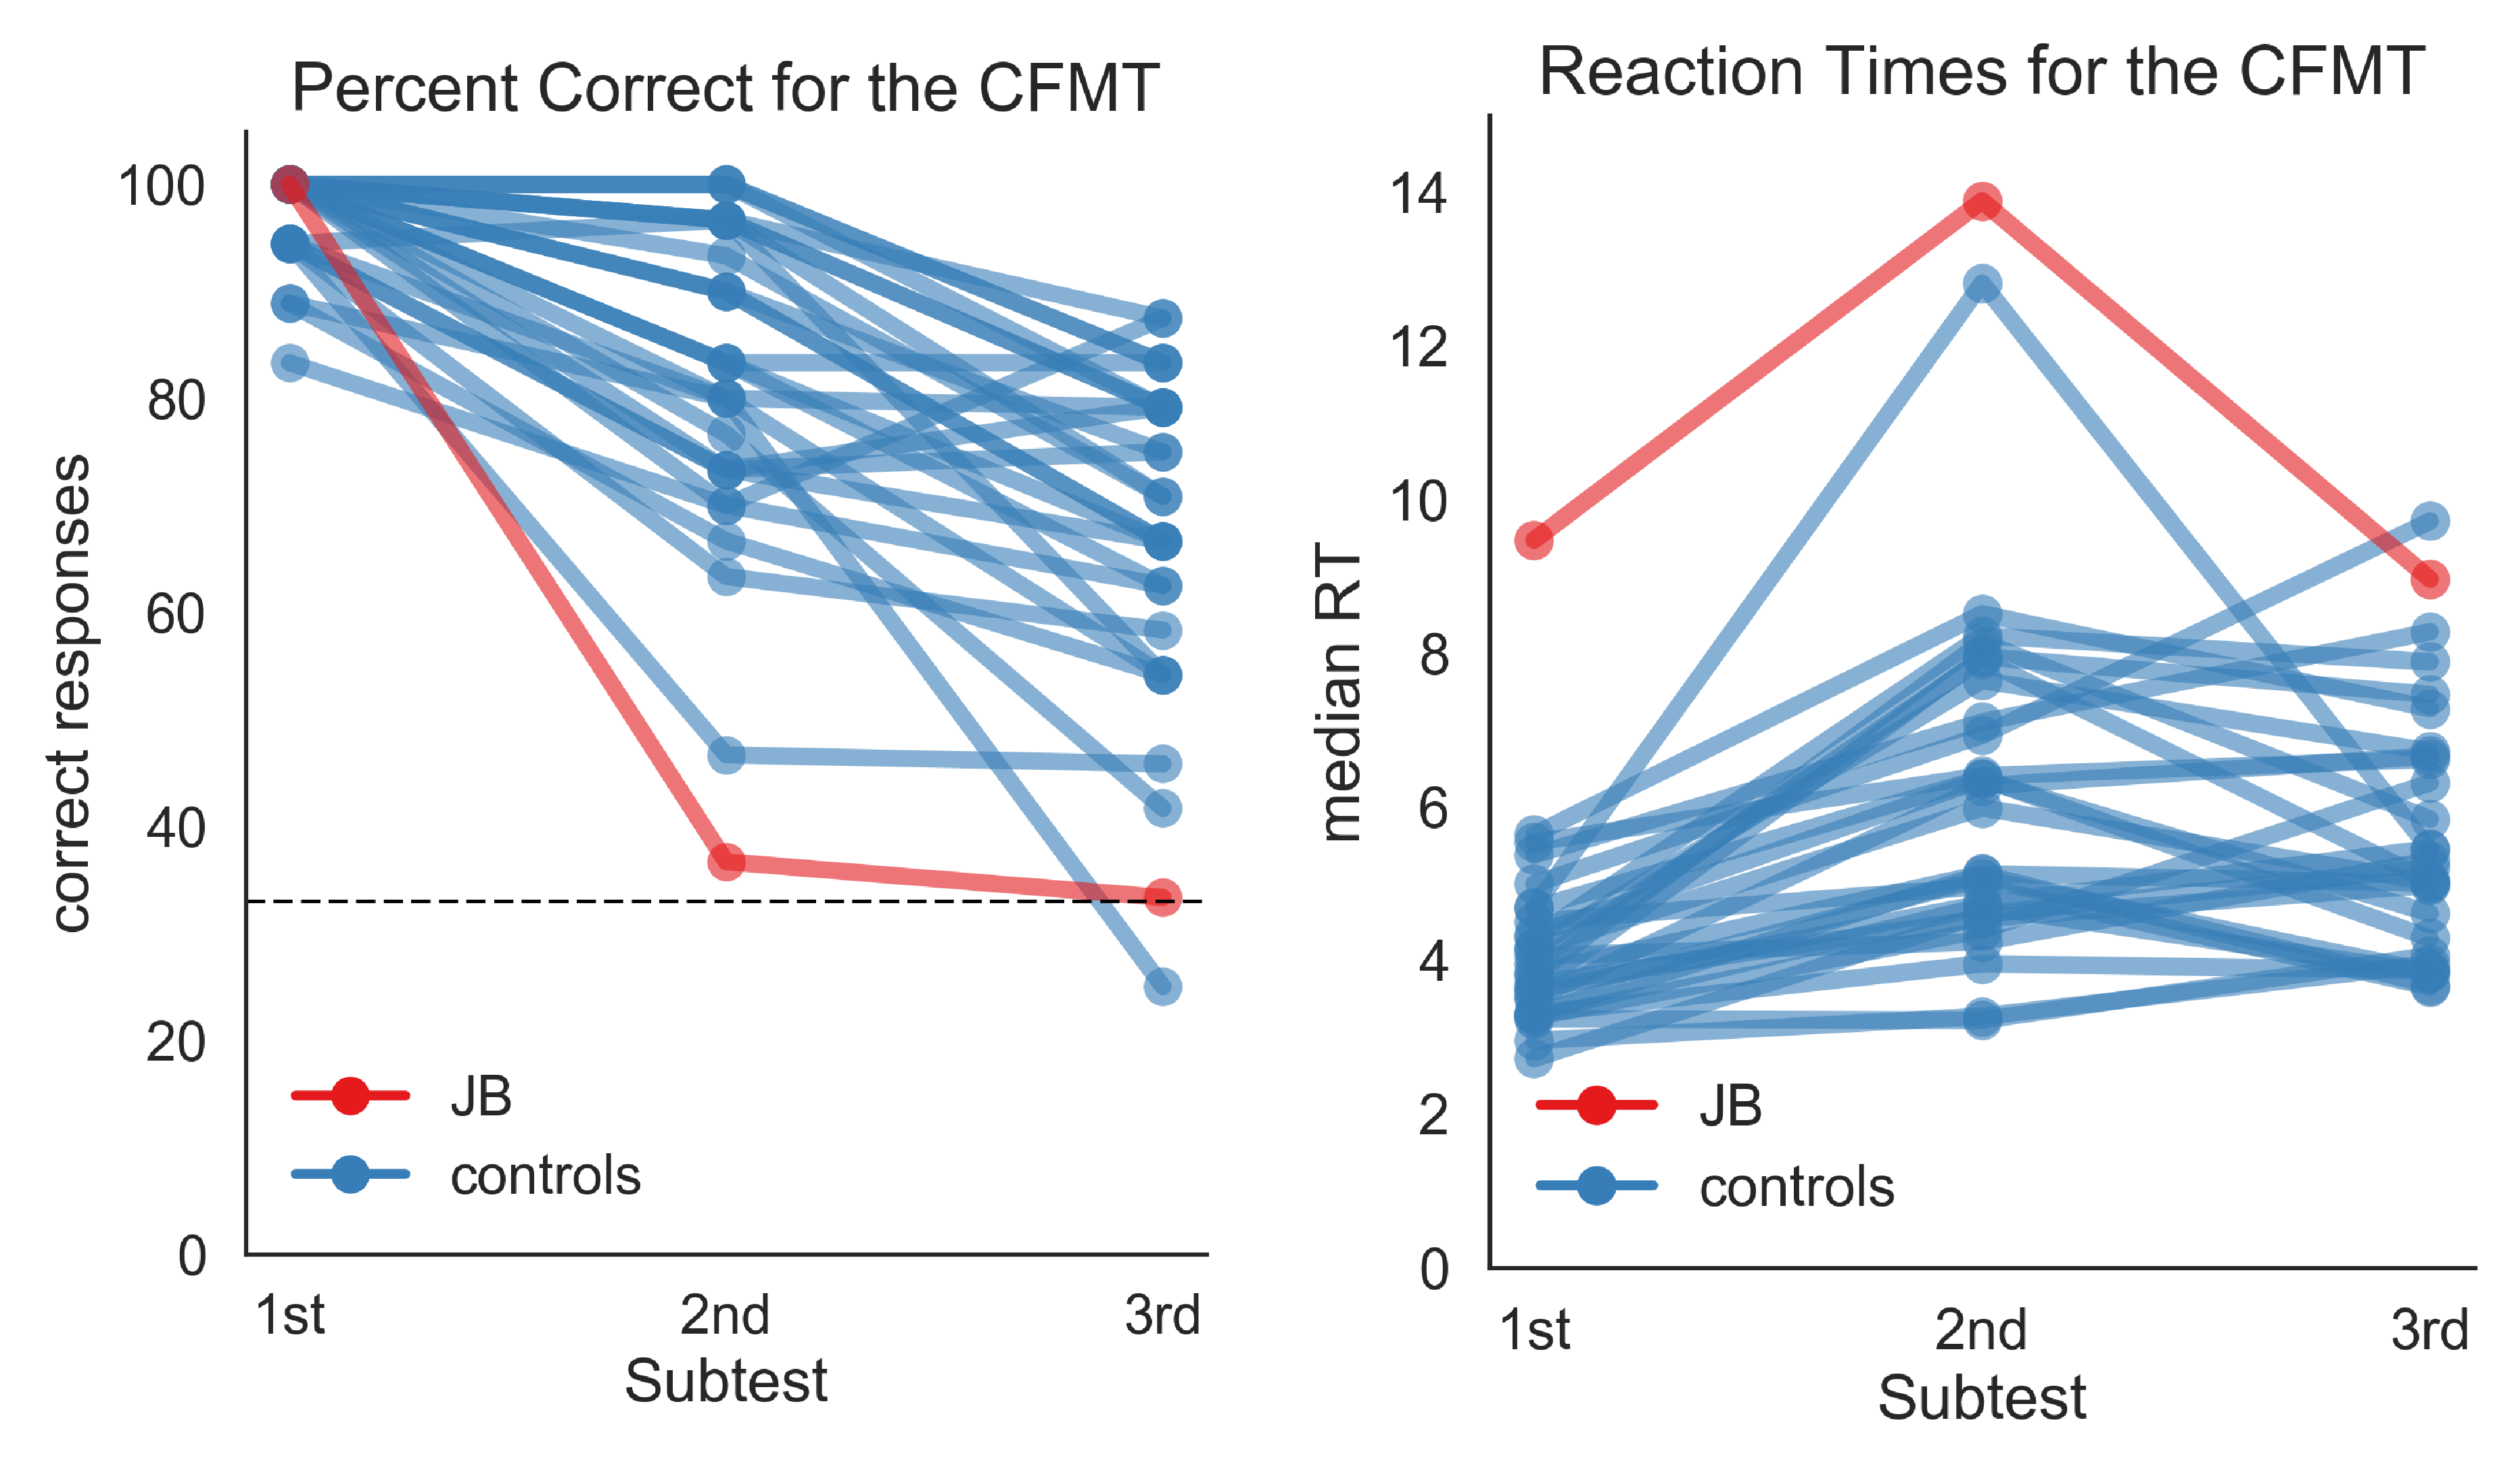

In [51]:
msFig

In [52]:
msFig.savefig('../reports/figures/cambridge_main_figure.png',bbox_inches='tight')

### seaborn plot

In [53]:
bigDf['group'] = [['controls', 'jb'][bigDf.index.levels[0][x] == 'jb'] for x in bigDf.index.labels[0]]
bigDf['task'] = [bigDf.index.levels[1][x] for x in bigDf.index.labels[1]]

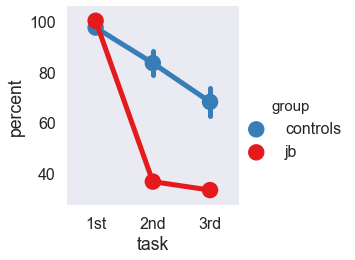

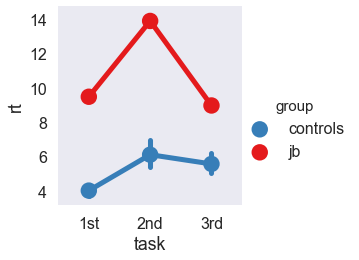

In [54]:
sns.factorplot(data=bigDf, x='task', y='percent', hue='group', palette=myPalette)
sns.factorplot(data=bigDf, x='task', y='rt', hue='group', palette=myPalette)

### Plot Accuracy and Reaction Times together

In [55]:
stackDf = bigDf.unstack(1).reorder_levels([1, 0], axis=1).sort_index(axis=1)

In [56]:
stackDf.tail()

1st                                            2nd                   \
       group   hit     percent      rt task total     group   hit    percent   
6   controls  18.0  100.000000  3.9425  1st  18.0  controls  22.0  73.333333   
7   controls  17.0   94.444444  4.1595  1st  18.0  controls  22.0  73.333333   
8   controls  17.0   94.444444  4.0540  1st  18.0  controls  29.0  96.666667   
9   controls  18.0  100.000000  3.4930  1st  18.0  controls  29.0  96.666667   
jb        jb  18.0  100.000000  9.4675  1st  18.0        jb  11.0  36.666667   

                             3rd                                      
         rt task total     group   hit    percent      rt task total  
6    7.9160  2nd  30.0  controls  16.0  66.666667  5.0255  3rd  24.0  
7    7.6415  2nd  30.0  controls  19.0  79.166667  6.7170  3rd  24.0  
8    4.2380  2nd  30.0  controls  13.0  54.166667  5.2990  3rd  24.0  
9    6.2665  2nd  30.0  controls  17.0  70.833333  6.6585  3rd  24.0  
jb  13.8840  2nd  30.0        jb   8.0  33.333333  8.9590  3rd  24.0

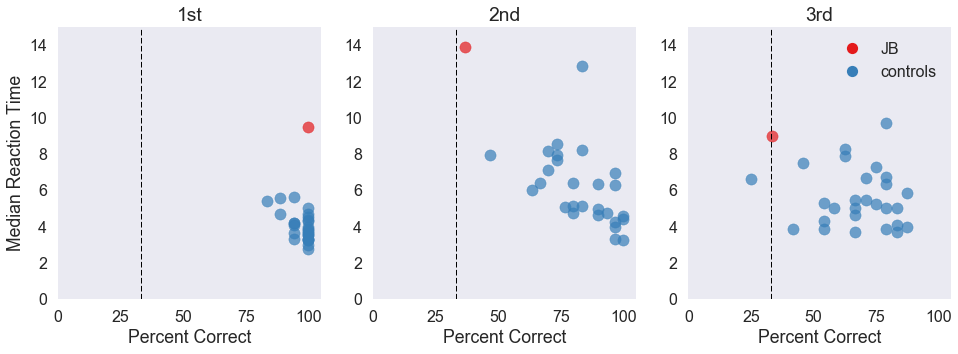

In [57]:
fig = plt.figure(figsize=(16, 5))

for i, part in enumerate(['1st', '2nd', '3rd']):
    ax = plt.subplot(1, 3, i + 1)

    ax.scatter(
        stackDf.drop('jb')[part]['percent'],
        stackDf.drop('jb')[part]['rt'],
        color=myPalette[0],
        alpha=0.7,
        label=None)
    ax.scatter(
        stackDf.loc['jb'][part]['percent'],
        stackDf.loc['jb'][part]['rt'],
        color=myPalette[1],
        alpha=0.7)

    ax.set_xlim(0, 105)
    ax.set_ylim(0, 15)
    ax.axvline(33, color='k', linewidth=1, linestyle='dashed')

    if i == 0:
        ax.set_ylabel('Median Reaction Time')

    ax.set_xlabel('Percent Correct')
    ax.set_title(part)

sns.despine()
ax.plot([], 'o', label='JB', color=myPalette[1])
ax.plot([], 'o', label='controls', color=myPalette[0])
ax.legend(loc='best')

plt.show()